# Exploring Generative Artificial Intelligence with PandasAI, OpenAI, and Comet ML

## Install PandaAI

PandasAI is a Python library that adds Generative AI capabilities to pandas.

Check out the [PandasAI offical docs](https://docs.pandas-ai.com/en/latest/)



In [ ]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.20
    Uninstalling SQLAlchemy-2.0.20:
      Successfully uninstalled SQLAlchemy-2.0.20
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.16.1 which is incompatible.


### Mounting our drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Our dataset

We will make use of the [House Rent Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset). This Dataset contains information about 4700+ Houses available for Renting

In [ ]:
import pandas as pd

df = pd.read_csv('/content/House_Rent_Dataset.csv')

In [ ]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Exploring Our Dataset with PandsAI and OpenAI

You can learn more from the [OpenAI official docs](https://platform.openai.com/docs/introduction)

In [ ]:
from pandasai.llm import OpenAI

# llm = OpenAI(api_token="*****PUT YOUR TOKEN HERE*****")

In [ ]:
from pandasai import SmartDataframe

sdf = SmartDataframe(df, config={"llm": llm})

In [ ]:
sdf.impute_missing_values()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
sdf.chat("who is the ideal tenat for a 3 bedroom in kolakat")

'The ideal tenant for a 3 bedroom in Kolkata is Bachelors/Family.'

In [ ]:
sdf.chat("Return the top 5 expensive city by rent")

,Rent
City,
Mumbai,85321.204733
Delhi,29461.983471
Bangalore,24966.365688
Chennai,21614.092031
Hyderabad,20555.048387


In [ ]:
sdf.chat("In a table show me the average rent in the various cities each month and group this data by the BHK")

#BHK here represent number of bedrooms, hall, and kitchen

BHK                    1                                           \
City           Bangalore      Chennai         Delhi     Hyderabad   
Year Month                                                          
2022 4       9175.000000  7666.666667  10694.444444   7875.000000   
     5       8361.467890  8826.515152  10820.312500   8479.365079   
     6       9682.758621  7832.793651  11665.000000  12424.444444   
     7      11819.354839  9153.571429  12683.333333   9060.000000   

BHK                                               2                \
City            Kolkata        Mumbai     Bangalore       Chennai   
Year Month                                                          
2022 4      6975.000000  21833.333333  15642.857143  10012.500000   
     5      7069.811321  30128.382716  15259.340659  14403.225806   
     6      6509.859155  29369.362205  16652.298851  14020.245810   
     7      8670.000000  30293.103448  17507.407407  21852.378641   

BHK                                     ...             4                 \
City               Delhi     Hyderabad  ...       Kolkata         Mumbai   
Year Month                              ...                                
2022 4      15250.000000  13458.333333  ...  22666.666667            NaN   
     5      18000.000000  13324.858757  ...  35000.000000  270500.000000   
     6      20119.430556  13541.176471  ...  24600.000000  322000.000000   
     7      21463.414634  15361.855769  ...  35000.000000  230652.173913   

BHK               5                                                     6  \
City        Chennai     Delhi Hyderabad  Kolkata         Mumbai   Chennai   
Year Month                                                                  
2022 4          NaN       NaN       NaN      NaN            NaN       NaN   
     5      75000.0  190000.0   45000.0  25000.0  512500.000000       NaN   
     6          NaN       NaN       NaN  22500.0  392500.000000  170000.0   
     7          NaN       NaN  175000.0      NaN  416666.666667       NaN   

BHK                                
City           Hyderabad  Kolkata  
Year Month                         
2022 4               NaN      NaN  
     5      35000.000000      NaN  
     6      60000.000000  20000.0  
     7      43333.333333      NaN  

[4 rows x 32 columns]

In [ ]:
sdf.chat("In a table show me the number of Point of Contact in the various cities each month and group this data by the Point of Contact")

Point of Contact Contact Agent                                         \
City                 Bangalore Chennai Delhi Hyderabad Kolkata Mumbai   
Year Month                                                              
2022 4                       0       0     0         0       0      1   
     5                      45      31    84        14      18    185   
     6                      79      43    99        28      46    340   
     7                      58      60    59        68      17    254   

Point of Contact Contact Builder Contact Owner                          \
City                   Hyderabad     Bangalore Chennai Delhi Hyderabad   
Year Month                                                               
2022 4                         0            41      24    55        32   
     5                         0           313     299   165       304   
     6                         1           272     290   107       266   
     7                         0            78     144    36       155   

Point of Contact                 
City             Kolkata Mumbai  
Year Month                       
2022 4                41     34  
     5               155     68  
     6               219     69  
     7                28     21

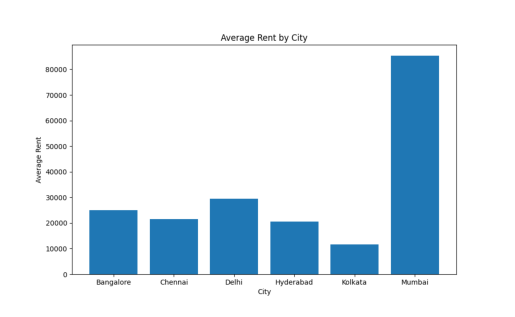

In [ ]:
sdf.chat("Plot a chart of the average rent by city")

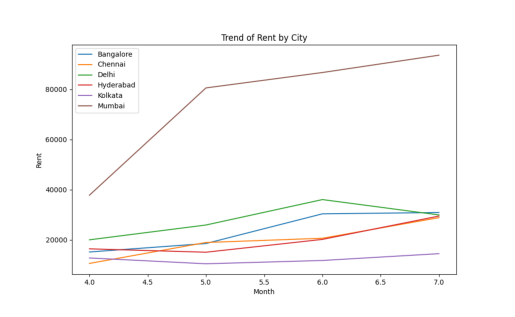

In [ ]:
sdf.chat("Create a line chart to show the trend of rent  by city in the last few months")

In [ ]:
sdf.plot_correlation_heatmap()

ERROR:pandasai.helpers.logger:Failed with error: list index out of range. Retrying


In [ ]:
sdf.chat("Calculate the aveage cost of rent in Delhi")

29461.98347107438

### Counting Your Tokens

You can visit the [OpenAI official docs](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them) to learn more tokens.

In [ ]:
from pandasai.helpers.openai_info import get_openai_callback

with get_openai_callback() as cb:
    response = sdf.chat("Calculate the aveage cost of rent in Delhi")
    print(response)
    print(cb)

29461.98347107438
Tokens Used: 0
	Prompt Tokens: 0
	Completion Tokens: 0
Total Cost (USD): $ 0.000000


### Logging to the Comet Platform

Comet’s ML platform help you use track, compare, explain, and optimize their models across the complete ML lifecycle – from managing experiments to monitoring models in production.

Learn more from the [official docs](https://www.comet.com/docs/v2/)

## Logging to New Experiment

Here we log our artifact

In [ ]:
import comet_ml
from comet_ml import Artifact, Experiment

#Initalize comet instance for API Key
comet_ml.init()

#create and experiment
experiment = Experiment(project_name="Rent Experiment", workspace="bennykillua")

# Intialize Artifact
artifact = Artifact(name="HouseRent", artifact_type="dataset")

#Specify the path of the artifact
artifact.add(r"/content/House_Rent_Dataset.csv")

#log artifact to experiment [comet platform]
experiment.log_artifact(artifact)

#end the experiment
experiment.end()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: openai.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/bennykillua/rent-experiment/18a63cd11e4b424483cdce09c619c0a5

COMET INFO: Artifact 'HouseRent' version 1.0.0 created
COMET INFO: Scheduling the upload of 1 assets for a size of 553.67 KB, this can take some time
COMET INFO: Artifact 'bennykillua/HouseRent:1.0.0' has started uploading asynchronously
COMET INFO: -------------------------------------------------------------------

<p align="center">
    <picture>
        <source alt="cometLLM" media="(prefers-color-scheme: dark)" srcset="https://github.com/comet-ml/comet-llm/raw/main/logo-dark.svg">
        <img alt="cometLLM" src="https://github.com/comet-ml/comet-llm/raw/main/logo.svg">
    </picture>
</p>
<p align="center">
    <a href="https://pypi.org/project/comet-llm">
        <img src="https://img.shields.io/pypi/v/comet-llm" alt="PyPI version"></a>
    <a rel="nofollow" href="https://opensource.org/license/mit/">
        <img alt="GitHub" src="https://img.shields.io/badge/License-MIT-blue.svg"></a>   
    <a href="https://www.comet.com/docs/v2/guides/large-language-models/overview/" rel="nofollow">
        <img src="https://img.shields.io/badge/cometLLM-Docs-blue.svg" alt="cometLLM Documentation"></a>
    <a rel="nofollow" href="https://pepy.tech/project/comet-llm">
        <img style="max-width: 100%;" src="https://static.pepy.tech/badge/comet-llm" alt="Downloads"></a>   
</p>
<p align="center">

CometLLM is a new suite of LLMOps tools designed to help you effortlessly track and visualize your LLM prompts and chains. Use CometLLM to identify effective prompt strategies, streamline your troubleshooting, and ensure reproducible workflows.  

CometLLM complements Comet experiment tracking and production model management tools to arm LLM practitioners with everything they need to interact with, manage, and optimize their models with ease.  

👉 The best part? [It's 100% free to get started!](https://www.comet.com/signup/?utm_source=comet_llm&utm_medium=referral&utm_content=intro_colab)

In [ ]:
pip install comet_llm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.2/567.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 38.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.2
    Uninstalling websocket-client-1.6.2:
      Successfully uninstalled websocket-client-1.6.2
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [ ]:
import comet_llm

comet_llm.log_prompt(
    prompt="What is your name?",
    output=" My name is Benny Ifeanyi",
    api_key="YOUR_COMET_API_KEY",
    project = "MY_Project_",
)

LLMResult(id='90a487eb6f304f22bfa3db7eed81d4f2', project_url='https://www.comet.com/bennykillua/MY_Project_')

In [ ]:
import comet_llm
import os


# Define your questions
questions = [
    "Return the top 5 expensive city by rent"
]

# Create a list to store question-response pairs
question_response_pairs = []

# Log the questions and responses to CometLLM and store them
for question in questions:
    # Generate the response using sdf.chat (this is the PandaAI model we created earlier)
    response = sdf.chat(question)  # Response is a string

    # Store the question and response in the list
    question_response_pairs.append({"question": question, "response": response})

# Save the question-response pairs to a CSV file
csv_file_path = '/content/question_response_pairs.csv'
pairs_df = pd.DataFrame(question_response_pairs)
pairs_df.to_csv(csv_file_path, index=False)

with open(csv_file_path, 'r') as csv_file:
    csv_content = csv_file.read()

# Log the entire CSV content as the response to CometLLM
comet_llm.log_prompt(
    prompt="Question-Response Pairs",
    output=csv_content,
    api_key="YOUR_COMET_API_KEY",
    project="MY_Project_",
)


LLMResult(id='f5621de78ffc4c1fad853a4d80ce8bbb', project_url='https://www.comet.com/bennykillua/MY_Project_')